In [155]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from scipy.cluster.vq import whiten, kmeans2

In [156]:
def call_api(uri):
    json = {}
    try:
        json = requests.get(uri, headers={'X-Auth-Token': '0b5ccea9ddd142bc9ad15998feb039a3'}).json()
        return json
    except:
        print(json)
        return None

In [157]:
competitions = call_api('http://api.football-data.org/v1/competitions')
competitions

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/competitions/444/fixtures'},
   'leagueTable': {'href': 'http://api.football-data.org/v1/competitions/444/leagueTable'},
   'self': {'href': 'http://api.football-data.org/v1/competitions/444'},
   'teams': {'href': 'http://api.football-data.org/v1/competitions/444/teams'}},
  'caption': 'Campeonato Brasileiro da Série A',
  'currentMatchday': 24,
  'id': 444,
  'lastUpdated': '2017-09-14T13:00:01Z',
  'league': 'BSA',
  'numberOfGames': 380,
  'numberOfMatchdays': 38,
  'numberOfTeams': 20,
  'year': '2017'},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/competitions/445/fixtures'},
   'leagueTable': {'href': 'http://api.football-data.org/v1/competitions/445/leagueTable'},
   'self': {'href': 'http://api.football-data.org/v1/competitions/445'},
   'teams': {'href': 'http://api.football-data.org/v1/competitions/445/teams'}},
  'caption': 'Premier League 2017/18',
  'currentMatchday': 5,
  'id': 445,


In [158]:
for competition in competitions:
    print("{}, number of participating teams: {}, games played: {}".format(competition['caption'], competition['numberOfTeams'], competition['numberOfGames']))

Campeonato Brasileiro da Série A, number of participating teams: 20, games played: 380
Premier League 2017/18, number of participating teams: 20, games played: 380
Championship 2017/18, number of participating teams: 24, games played: 552
League One 2017/18, number of participating teams: 24, games played: 552
League Two 2017/18, number of participating teams: 24, games played: 552
Eredivisie 2017/18, number of participating teams: 18, games played: 306
Ligue 1 2017/18, number of participating teams: 20, games played: 380
Ligue 2 2017/18, number of participating teams: 20, games played: 380
1. Bundesliga 2017/18, number of participating teams: 18, games played: 306
2. Bundesliga 2017/18, number of participating teams: 18, games played: 306
Primera Division 2017, number of participating teams: 20, games played: 380
Serie A 2017/18, number of participating teams: 20, games played: 380
Primeira Liga 2017/18, number of participating teams: 18, games played: 306
DFB-Pokal 2017/18, number of

In [159]:
competition_prepared = []
for competition in competitions:
    competition_prepared.append({'name': competition['caption'], 'games': competition['numberOfGames'], 'teams': competition['numberOfTeams']})
competition_prepared

[{'games': 380, 'name': 'Campeonato Brasileiro da Série A', 'teams': 20},
 {'games': 380, 'name': 'Premier League 2017/18', 'teams': 20},
 {'games': 552, 'name': 'Championship 2017/18', 'teams': 24},
 {'games': 552, 'name': 'League One 2017/18', 'teams': 24},
 {'games': 552, 'name': 'League Two 2017/18', 'teams': 24},
 {'games': 306, 'name': 'Eredivisie 2017/18', 'teams': 18},
 {'games': 380, 'name': 'Ligue 1 2017/18', 'teams': 20},
 {'games': 380, 'name': 'Ligue 2 2017/18', 'teams': 20},
 {'games': 306, 'name': '1. Bundesliga 2017/18', 'teams': 18},
 {'games': 306, 'name': '2. Bundesliga 2017/18', 'teams': 18},
 {'games': 380, 'name': 'Primera Division 2017', 'teams': 20},
 {'games': 380, 'name': 'Serie A 2017/18', 'teams': 20},
 {'games': 306, 'name': 'Primeira Liga 2017/18', 'teams': 18},
 {'games': 48, 'name': 'DFB-Pokal 2017/18', 'teams': 64},
 {'games': 462, 'name': 'Serie B 2017/18', 'teams': 22},
 {'games': 96, 'name': 'Champions League 2017/18', 'teams': 32},
 {'games': 135, '

In [160]:
competitions_pd = pd.DataFrame(competition_prepared)
competitions_pd

,games,name,teams
0,380,Campeonato Brasileiro da Série A,20
1,380,Premier League 2017/18,20
2,552,Championship 2017/18,24
3,552,League One 2017/18,24
4,552,League Two 2017/18,24
5,306,Eredivisie 2017/18,18
6,380,Ligue 1 2017/18,20
7,380,Ligue 2 2017/18,20
8,306,1. Bundesliga 2017/18,18
9,306,2. Bundesliga 2017/18,18


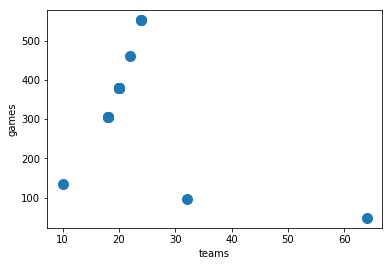

In [161]:
competitions_pd.plot.scatter(x='teams', y='games', s=100)

In [162]:
del competitions_pd['name']
competitions_pd

,games,teams
0,380,20
1,380,20
2,552,24
3,552,24
4,552,24
5,306,18
6,380,20
7,380,20
8,306,18
9,306,18


In [163]:
competitions_whitened = whiten(competitions_pd.as_matrix())
competitions_pd

,games,teams
0,380,20
1,380,20
2,552,24
3,552,24
4,552,24
5,306,18
6,380,20
7,380,20
8,306,18
9,306,18


In [179]:
centroids, cluster_map = kmeans2(competitions_whitened, 6)
centroids, cluster_map

/anaconda/lib/python3.6/site-packages/scipy/cluster/vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[ 3.69076265,  2.11996757],
        [ 0.33457339,  5.7735287 ],
        [ 3.83325969,  0.57346402],
        [ 4.89074185,  0.33406399],
        [ 2.30589498,  1.65660909],
        [ 0.66914677,  2.88676435]]),
 array([4, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 5, 4], dtype=int32))

In [186]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm', 5: 'k'}
colors = [colors_map[c] for c in cluster_map]
colors

['m',
 'm',
 'r',
 'r',
 'r',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'm',
 'g',
 'r',
 'k',
 'm']

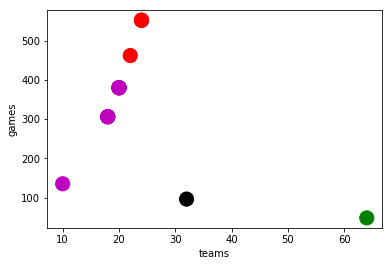

In [187]:
competitions_pd.plot.scatter(x='teams', y='games', c=colors, s=200)